<a href="https://colab.research.google.com/github/charchit/Presentation/blob/main/OpenCV/OpenCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Resources**

You can find more details about Colab [ here](https://colab.research.google.com/drive/1YKHHLSlG-B9Ez2-zf-YFxXTVgfC_Aqtt#scrollTo=CXnyoIOFGCYk)



In [2]:
# Nvidia System Management Interface: Used to check GPU resources
!nvidia-smi

Thu Apr 11 16:39:35 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [3]:
# Print working directory
!pwd
# Make directory
!mkdir tempdir
# List
!ls

/content
sample_data  tempdir


## Managing Python packages

In [4]:
!pip list

Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
aiohttp                          3.9.3
aiosignal                        1.3.1
alabaster                        0.7.16
albumentations                   1.3.1
altair                           4.2.2
annotated-types                  0.6.0
anyio                            3.7.1
appdirs                          1.4.4
argon2-cffi                      23.1.0
argon2-cffi-bindings             21.2.0
array_record                     0.5.1
arviz                            0.15.1
astropy                          5.3.4
astunparse                       1.6.3
async-timeout                    4.0.3
atpublic                         4.1.0
attrs                            23.2.0
audioread                        3.0.1
autograd                         1.6.2
Babel                            2.14.0
backcall                         0.2.0
beautifulsoup4                   4.12.3


In [5]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [6]:
import torch

torch.cuda.is_available()

True

In [7]:
# Clone the repository
!git clone https://github.com/charchit/Presentation.git

!ls

# To remove
#!rm -rf Presentation

Cloning into 'Presentation'...
remote: Enumerating objects: 32, done.
remote: Counting objects: 100% (32/32), done.
remote: Compressing objects: 100% (27/27), done.
remote: Total 32 (delta 3), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (32/32), 2.29 MiB | 19.74 MiB/s, done.
Resolving deltas: 100% (3/3), done.
gdrive	Presentation  sample_data  tempdir


In [8]:
%cd Presentation/OpenCV

/content/Presentation/OpenCV


In [9]:
!ls

elephant.png  lung.png	OpenCV.ipynb  rgb_pixels.png  screenshot_105.png


## OpenCV

The shape and datatype of img_rgb is :(480, 484, 3), and <class 'numpy.ndarray'>



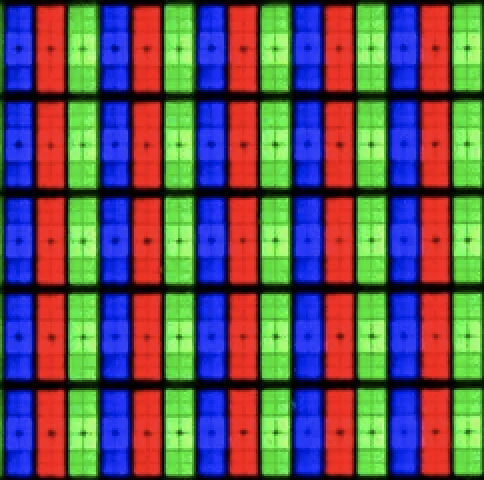

In [10]:
import cv2
from google.colab.patches import cv2_imshow

# Last argument 1 is for rgb, 0 is for grayscale
img_rgb = cv2.imread('rgb_pixels.png', 1)

# Img source: https://www.cnet.com/tech/home-entertainment/led-lcd-vs-oled/

# Checking shape and datatype of the loaded image
print(f'The shape and datatype of img_rgb is :{img_rgb.shape}, and {type(img_rgb)}\n')

# Show the original image
cv2_imshow(img_rgb)

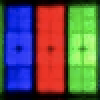

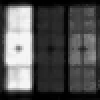

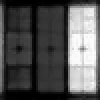

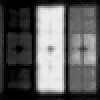

In [ ]:
# Be careful of the RGB channel sequence when using different image processing packages, some has a sequence of RGB, while some is BGR

cv2_imshow(img_rgb[:100,:100,:])
cv2_imshow(img_rgb[:100,:100,0])
cv2_imshow(img_rgb[:100,:100,1])
cv2_imshow(img_rgb[:100,:100,2])

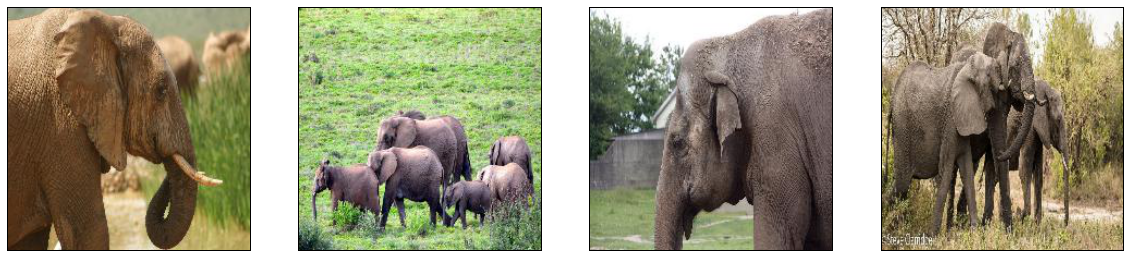

In [11]:
img = cv2.imread('elephant.png', 1)
cv2_imshow(img)

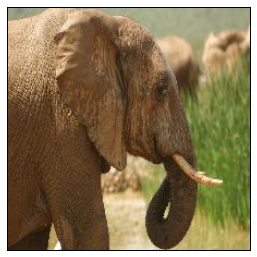

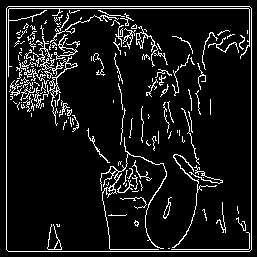

In [12]:
# Source: https://opencv24-python-tutorials.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_canny/py_canny.html
# Arguments are (img, threshold1, threshold2)
# img[:,:257,:] means we are cropping the image through matrix slicing. We are getting all the rows, columns until the 256th, and all RGB channels
edges = cv2.Canny(img[:,:257,:], 100, 200)
cv2_imshow(img[:,:257,:])
cv2_imshow(edges)

In [13]:
import numpy as np
import matplotlib.pyplot as plt

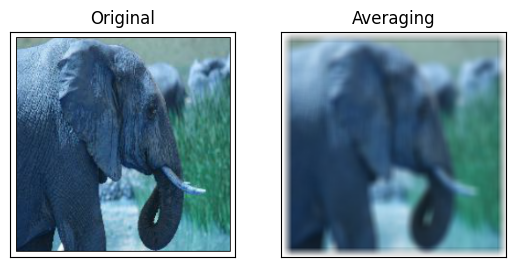

In [ ]:
# Try changing kernel size and observe what happens
kernel = np.ones((10,10), np.float32)/100

# Arguments are (source_image, depth, kernel)
dst = cv2.filter2D(src=img, ddepth=-1, kernel=kernel)

plt.subplot(121)
plt.imshow(img[:,:257,:]),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122)
plt.imshow(dst[:,:257,:]),plt.title('Averaging')
plt.xticks([]), plt.yticks([])
plt.show()

[[  9   9  11 ...  29  78 177]
 [ 13  13  16 ...  39  87 181]
 [ 15  14  17 ...  42  90 182]
 ...
 [ 45  64  77 ...  41  79 176]
 [ 49  70  83 ...  64  97 184]
 [ 85 129 154 ... 148 166 215]]
uint8
(437, 533)


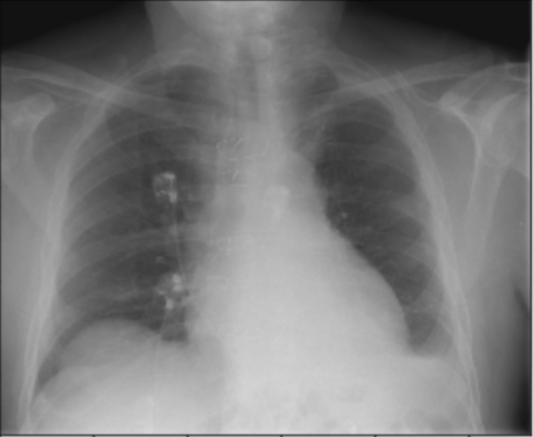

In [14]:
img = cv2.imread('lung.png', 0)
print(img)
print(img.dtype)
print(img.shape)
cv2_imshow(img)

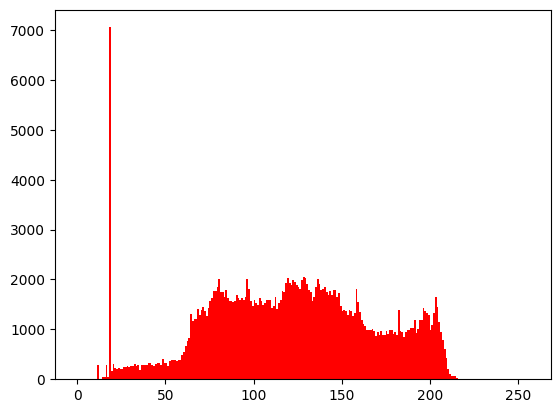

In [15]:
# Arguments are (img, bins, range)
_ = plt.hist(img.flatten(),256,[0,256], color = 'r')

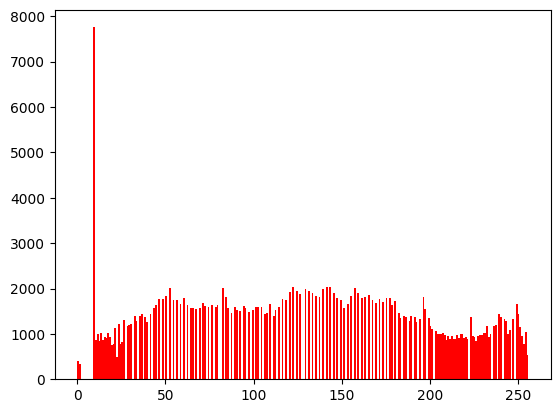

In [16]:
# Histogram equalization can be used to improve constrast of img
equ = cv2.equalizeHist(img)
_ = plt.hist(equ.flatten(),256,[0,256], color = 'r')

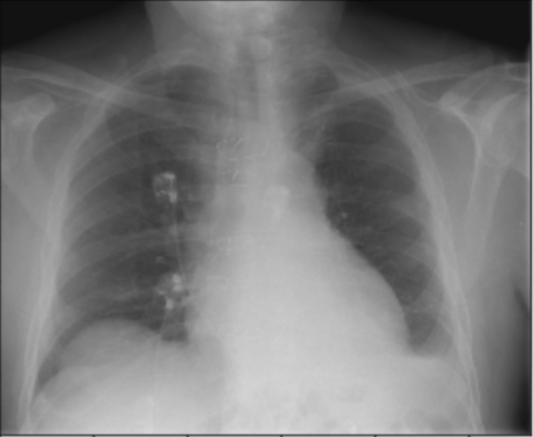

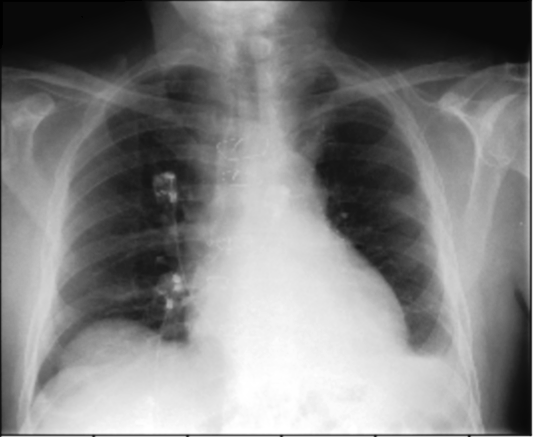

In [17]:
cv2_imshow(img)
cv2_imshow(equ)

## Thresholding

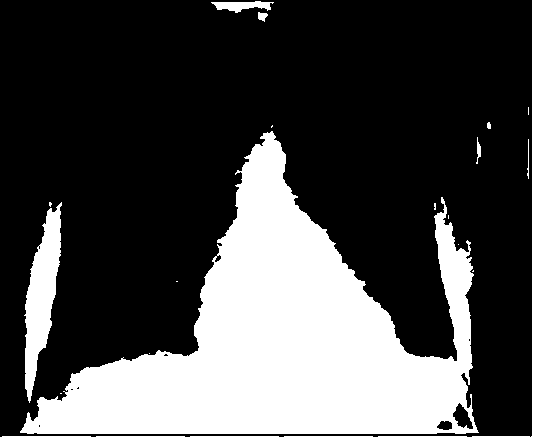

In [18]:
threshold_value = 150

# Apply the threshold
_, thresholded_image = cv2.threshold(img, threshold_value, 255, cv2.THRESH_BINARY)

# Display the thresholded image
cv2_imshow(thresholded_image)

## Denoising

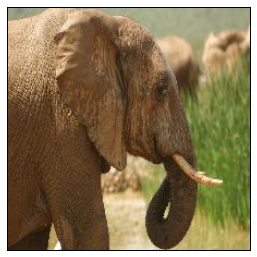

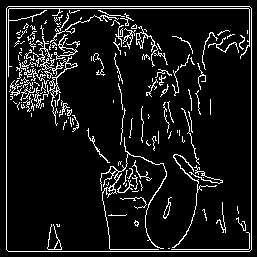

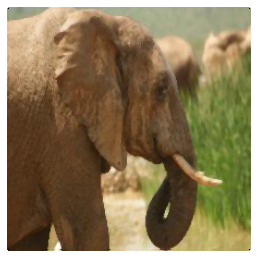

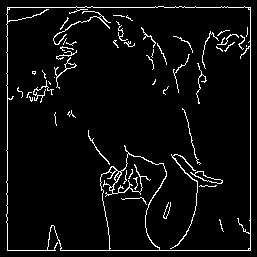

In [19]:
# Median filter is one way of denoising
img = cv2.imread('elephant.png')[:,:257,:]
median = cv2.medianBlur(img, 3)
cv2_imshow(img)
cv2_imshow((cv2.Canny(img,100,200)))
cv2_imshow(median)
edges = cv2.Canny(median,100,200)
cv2_imshow(edges)

More Details on different image processing operations can be found in:


1.   https://opencv24-python-tutorials.readthedocs.io/en/latest/py_tutorials/py_core/py_table_of_contents_core/py_table_of_contents_core.html
2.   https://scikit-image.org/docs/stable/auto_examples/index.html


In [20]:
from time import sleep
import os
import glob

In [21]:
def load_images_from_folder(folder):
    os.chdir(folder)
    file_paths = glob.glob("/*.png")
    images = []
    for file_path in file_paths:
        image = cv2.imread(file_path)
        if image is not None:
            yield image
        else:
            print(f"Warning: Failed to load image {file_path}")
    return images

In [22]:
def process_image(image, lower_color, upper_color, min_area, dark_threshold):
    drawing_image = image.copy()
    height, width = image.shape[:2]

    top_half = image[:height // 2, :]
    bottom_half = image[height // 2:, :]

    def find_largest_contour(half, offset=0):
        gray = cv2.GaussianBlur(half, (5, 5), 0)
        hsv = cv2.cvtColor(gray, cv2.COLOR_BGR2HSV)
        mask = cv2.inRange(hsv, lower_color, upper_color)
        kernel = np.ones((5, 5), np.uint8)
        thresh = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
        dilated_image = cv2.dilate(thresh, kernel, iterations=1)
        contours, _ = cv2.findContours(dilated_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        filtered_contours = [c for c in contours if cv2.contourArea(c) > min_area]

        if filtered_contours:
            largest_contour = max(filtered_contours, key=cv2.contourArea)
            hull = cv2.convexHull(largest_contour)
            x, y, w, h = cv2.boundingRect(hull)
            return x, y + offset, w, h, True
        return 0, 0, 0, 0, False

    # halves
    x_top, y_top, w_top, h_top, found_top = find_largest_contour(top_half)
    x_bottom, y_bottom, w_bottom, h_bottom, found_bottom = find_largest_contour(bottom_half, offset=height // 2)

    count = 0
    if found_top:
        cv2.rectangle(drawing_image, (x_top, y_top), (x_top + w_top, y_top + h_top), (123, 123, 123), 2)
        # ROI
        row_y = y_top+h_top-7
        roi = image[row_y:row_y+1, x_top:x_top+w_top]
        roi_gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
        _, dark_pixels = cv2.threshold(roi_gray, dark_threshold, 255, cv2.THRESH_BINARY_INV)
        count = cv2.countNonZero(dark_pixels)

        # mask
        red_mask = np.zeros_like(roi)
        red_mask[dark_pixels == 255] = [0, 0, 255]
        drawing_image[row_y:row_y+1, x_top:x_top+w_top][dark_pixels == 255] = [0, 0, 255]

    if found_bottom:
        cv2.rectangle(drawing_image, (x_bottom, y_bottom), (x_bottom + w_bottom, y_bottom + h_bottom), (123, 123, 123), 2)

    distance = 0
    if found_top and found_bottom:
        distance = y_bottom - (y_top + h_top)

    return drawing_image, count, distance

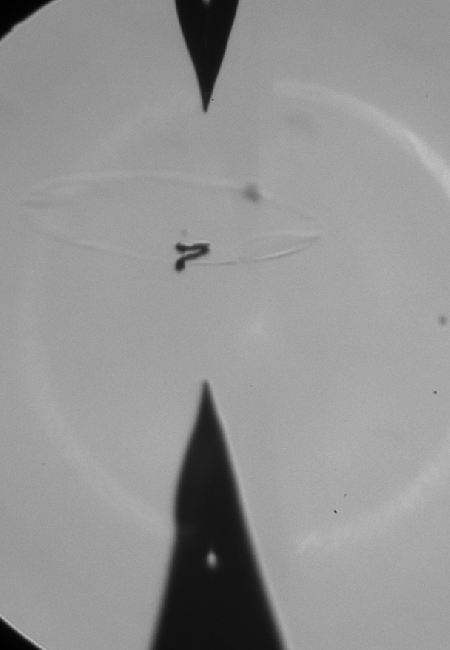

In [23]:
image = cv2.imread("screenshot_105.png")
cv2_imshow(image)

In [24]:
lower_color = np.array([0, 0, 0], dtype=np.uint8)
upper_color = np.array([179, 80, 60], dtype=np.uint8)
bottom_lower_color = np.array([0, 0, 0], dtype=np.uint8)
bottom_upper_color = np.array([179, 0, 100], dtype=np.uint8)
target_shape_contour = np.array([[[0, 150]], [[50, 0]],[[100, 150]]], dtype=np.int32)
bottom_target_shape_contour = np.array([[[0, 0]], [[50, 150]],[[100, 0]]], dtype=np.int32)
min_area = 2500
similarity_threshold = 0.3
dark_threshold = 50

processed_image, count, distance = process_image(image, lower_color, upper_color, min_area, dark_threshold)

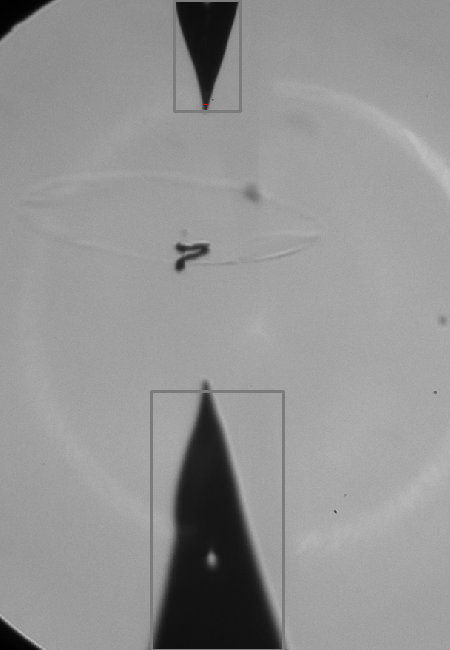

The shape and datatype of processed_image is :(650, 450, 3), and <class 'numpy.ndarray'>

The Diameter of nozzle:3 pixel, and distance between nozzles: 280 pixel



In [28]:
cv2_imshow(processed_image)
print(f'The shape and datatype of processed_image is :{processed_image.shape}, and {type(processed_image)}\n')
print(f'The Diameter of nozzle:{count} pixel, and distance between nozzles: {distance} pixel\n')